## Imports

In [52]:
import imageio
from skimage.color import rgb2gray # was used to make pictures gray
import numpy as np
from matplotlib import pyplot as plt

## Code

In [53]:
def compress(image_path, iterations):
    image = imageio.imread(image_path)
    u, s, vh = np.linalg.svd(image)

    new_image = np.zeros(image.shape)

    for i in range(iterations):
        u_i = u[:, i].reshape(-1, 1)
        vh_i = vh[i].reshape(1, -1)

        new_image += s[i] * (u_i @ vh_i)

    new_image = new_image.astype(dtype=np.uint8)
    
    return new_image

def show_images(image_path, iterations):
    fig, axs = plt.subplots(2, 3, figsize=(15,10))

    axs[0, 0].imshow(compress(image_path, iterations[0]), cmap='gray')
    axs[0, 1].imshow(compress(image_path, iterations[1]), cmap='gray')
    axs[0, 2].imshow(compress(image_path, iterations[2]), cmap='gray')
    axs[1, 0].imshow(compress(image_path, iterations[3]), cmap='gray')
    axs[1, 1].imshow(compress(image_path, iterations[4]), cmap='gray')
    axs[1, 2].imshow(imageio.imread(image_path), cmap='gray')
    plt.show()

## Images

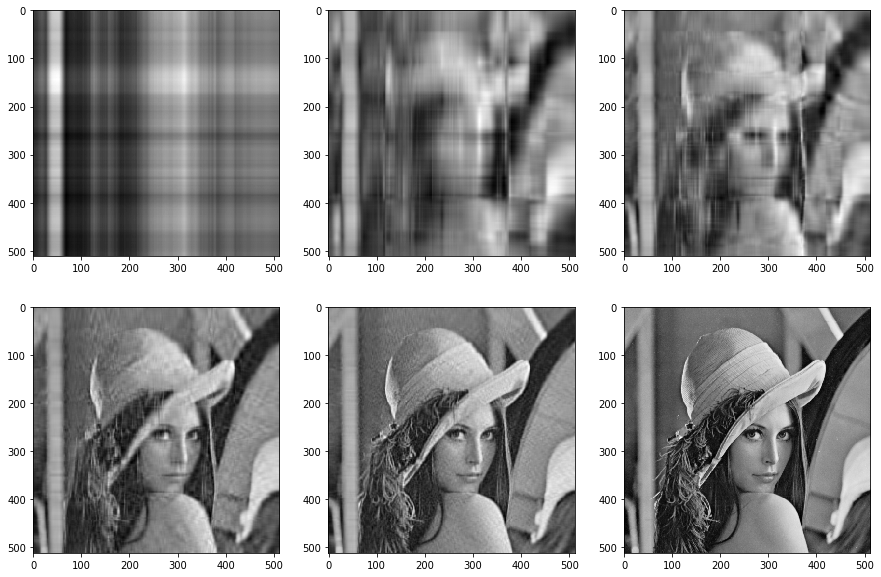

In [54]:
# first 5 pictures: k=1, k=5, k=10, k=25, k=50; last picture is a picture which was not compressed
show_images("lenna.png", (1, 5, 10, 25, 50))

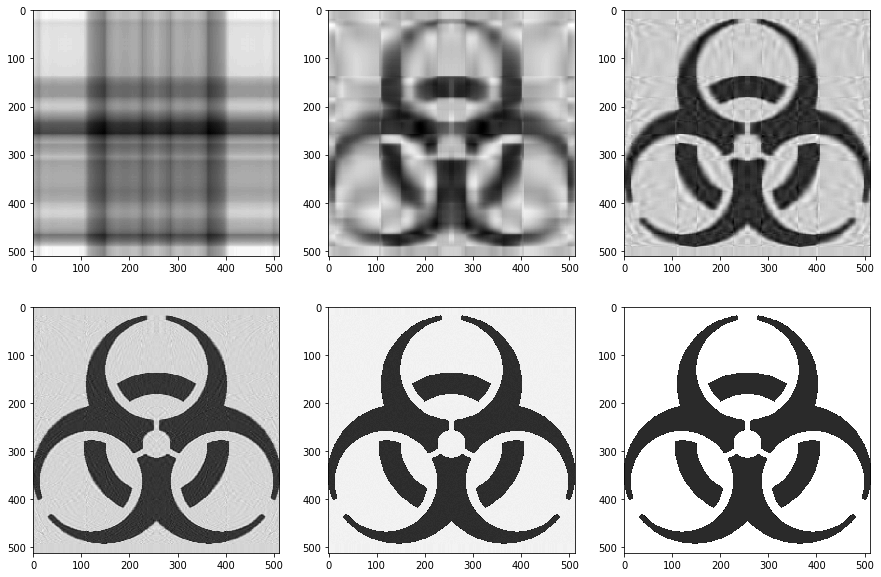

In [55]:
# first 5 pictures: k=1, k=5, k=15, k=50, k=256; last picture is a picture which was not compressed
show_images("image.png", (1, 5, 15, 50, 256))